In [318]:
import numpy as np
import pandas as pd
from biosppy.signals import emg
from biosppy import plotting
import matplotlib.pyplot as plt

In [319]:
import fileinput
for lines in fileinput.FileInput("forceful.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    print(lines)

In [320]:
forceful = np.loadtxt('forceful.txt')

In [321]:
forceful.size

9253

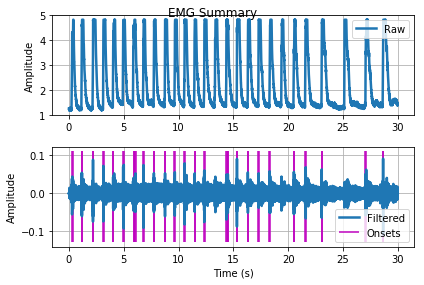

In [322]:
out = emg.emg(signal=forceful, sampling_rate=(forceful.size/30), show=True)

In [323]:
forceful1, forceful2,forceful3, forceful4 = np.split(forceful[0:9252],4)

In [324]:
forceful1.size

2313

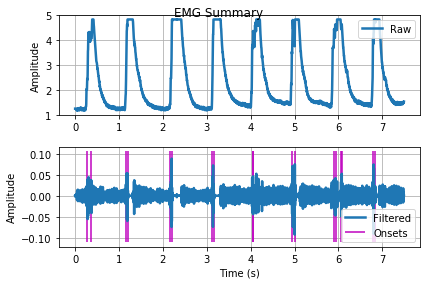

In [325]:
out = emg.emg(signal=forceful1, sampling_rate=(forceful.size/30), show=True)

In [326]:
classvar = np.zeros(9253, dtype=int)
classvar

array([0, 0, 0, ..., 0, 0, 0])

In [327]:
df = pd.DataFrame({'data':forceful, 'class':classvar, 'MAV':classvar, 'MAVS':classvar,'SSI':classvar, 'VAR':classvar,'RMS':classvar, 'WL':classvar, 'Trigger':classvar})


In [328]:
df.loc[12:25,'class'] = 0

In [329]:
df

,data,class,MAV,MAVS,SSI,VAR,RMS,WL,Trigger
0,1.25,0,0,0,0,0,0,0,0
1,1.25,0,0,0,0,0,0,0,0
2,1.25,0,0,0,0,0,0,0,0
3,1.25,0,0,0,0,0,0,0,0
4,1.24,0,0,0,0,0,0,0,0
5,1.24,0,0,0,0,0,0,0,0
6,1.23,0,0,0,0,0,0,0,0
7,1.23,0,0,0,0,0,0,0,0
8,1.22,0,0,0,0,0,0,0,0
9,1.22,0,0,0,0,0,0,0,0


In [330]:
for index, row in df.iterrows():
    if row['data'] > 1.6:
        df.loc[index, 'class'] = 1

In [331]:
print(len(df.index))


9253


In [332]:
#Calculate MAV
for index, row in df.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(df.index)):
            sum = sum + df.loc[index+index2, 'data']
    if(index+index2 < len(df.index)):
        df.loc[index+index2, 'MAV'] = sum/50

In [333]:
#Calculate MAVS
for index, row in df.iterrows():
    if(index+1 < len(df.index)):
        mavs = df.loc[index+1, 'MAV'] - df.loc[index, 'MAV']
        df.loc[index, 'MAVS'] = mavs

In [334]:
#Calculate SSI
for index, row in df.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(df.index)):
            sum = sum + abs(df.loc[index+index2, 'data'])**2
    if(index+index2 < len(df.index)):
        df.loc[index+index2, 'SSI'] = sum

In [335]:
#Calculate VAR
for index, row in df.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(df.index)):
            sum = sum + abs(df.loc[index+index2, 'data'])**2
    if(index+index2 < len(df.index)):
        df.loc[index+index2, 'VAR'] = sum/49

In [336]:
#Calculate RMS
for index, row in df.iterrows():
    tmp = df.loc[index, 'SSI']/50
    final = np.sqrt(tmp)
    df.loc[index, 'RMS'] = final

In [337]:
#Calculate WL
for index, row in df.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2+1 < len(df.index)):
            sum = sum + abs((df.loc[index+index2, 'data'] + df.loc[index+index2+1, 'data']))
    if(index+index2 < len(df.index)):
        df.loc[index+index2, 'WL'] = sum/50

In [338]:
#Calculate Trigger
for index, row in df.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(df.index)):
            sum = sum + df.loc[index+index2, 'class']
    if(index+index2 < len(df.index)):
        if(sum/50 > .75):
            df.loc[index+index2, 'Trigger'] = 1
        else:
            df.loc[index+index2, 'Trigger'] = 0

In [349]:
df
#with pd.option_context("display.max_rows", 1000):
#    display(df)

,data,class,MAV,MAVS,SSI,VAR,RMS,WL,Trigger
0,1.25,0,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0
1,1.25,0,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0
2,1.25,0,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0
3,1.25,0,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0
4,1.24,0,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0
5,1.24,0,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0
6,1.23,0,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0
7,1.23,0,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0
8,1.22,0,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0
9,1.22,0,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0


In [340]:
for lines in fileinput.FileInput("soft.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    print(lines)
soft = np.loadtxt('soft.txt')

In [341]:
soft.size

9251

In [342]:
soft1, soft2, soft3, soft4 = np.split(soft[0:9248],4)

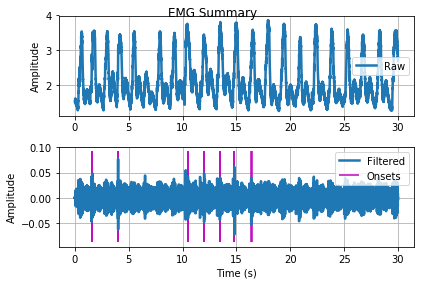

In [343]:
out = emg.emg(signal=soft, sampling_rate=(soft.size/30), show=True)

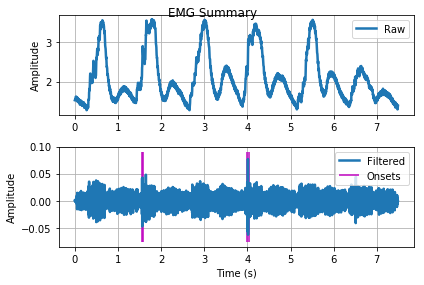

In [344]:
out = emg.emg(signal=soft1, sampling_rate=(soft.size/30), show=True)

In [345]:
classvar = np.zeros(9251, dtype=int)
classvar

array([0, 0, 0, ..., 0, 0, 0])

In [346]:
dfs = pd.DataFrame({'data':soft, 'class':classvar, 'MAV':classvar, 'MAVS':classvar,'SSI':classvar, 'VAR':classvar,'RMS':classvar, 'WL':classvar})

In [347]:
for index, row in dfs.iterrows():
    if row['data'] > 2.2:
        dfs.loc[index, 'class'] = 1

In [350]:
dfs
#with pd.option_context("display.max_rows", 1000):
#    display(dfs)

,data,class,MAV,MAVS,SSI,VAR,RMS,WL
0,1.53,0,0,0,0,0,0,0
1,1.54,0,0,0,0,0,0,0
2,1.55,0,0,0,0,0,0,0
3,1.55,0,0,0,0,0,0,0
4,1.56,0,0,0,0,0,0,0
5,1.59,0,0,0,0,0,0,0
6,1.61,0,0,0,0,0,0,0
7,1.62,0,0,0,0,0,0,0
8,1.62,0,0,0,0,0,0,0
9,1.62,0,0,0,0,0,0,0
